 # Loading the datasets into a numpy array 

In [24]:
import numpy as np
import pandas as pd

# Load the Fashion-MNIST test dataset
test_data = pd.read_csv('fashion-mnist_test.csv').values
test_labels = test_data[:, 0]  # First column contains the labels
test_images = test_data[:, 1:]  # Remaining columns contain the image pixels
test_images = test_images.reshape(-1, 28, 28)  # Reshape images to 28x28

# Load the Fashion-MNIST train dataset
train_data = pd.read_csv('fashion-mnist_train.csv').values
train_labels = train_data[:, 0]  # First column contains the labels
train_images = train_data[:, 1:]  # Remaining columns contain the image pixels
train_images = train_images.reshape(-1, 28, 28)  # Reshape images to 28x28

print(train_data)
print(train_labels)
print(train_images)
print(test_data)
print(test_labels)
print(test_images)

[[2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 ...
 [8 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]]
[2 9 6 ... 8 8 7]
[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0  

# EDA of Fashion Mnist train and test dataset referencing [Mnist Deep Neural Network]('https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras')
### the to_categorical function from Keras is used to convert the labels to one-hot encoded vectors. The num_classes argument specifies the number of classes in the dataset, which is 10 in the case of Fashion-MNIST 





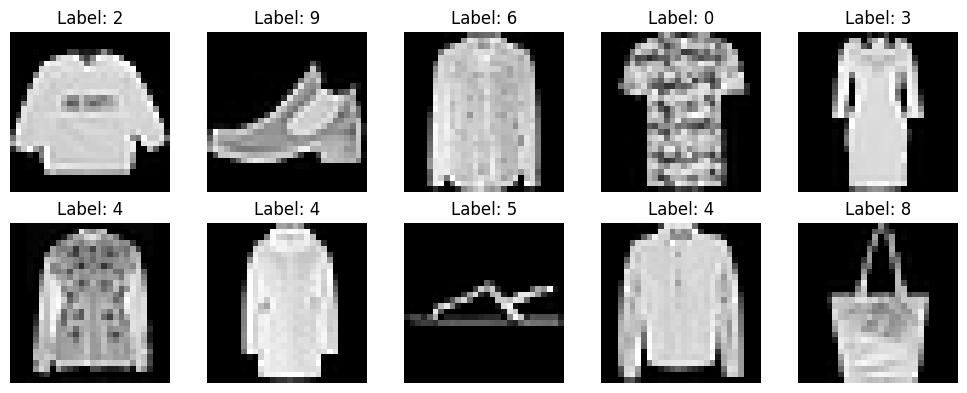

Epoch 1/10
375/375 [==============================] - 7s 10ms/step - loss: 0.4838 - accuracy: 0.8252 - val_loss: 0.3831 - val_accuracy: 0.8582
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3372 - accuracy: 0.8772 - val_loss: 0.3709 - val_accuracy: 0.8613
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3002 - accuracy: 0.8896 - val_loss: 0.3444 - val_accuracy: 0.8706
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2694 - accuracy: 0.9003 - val_loss: 0.3274 - val_accuracy: 0.8837
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2456 - accuracy: 0.9078 - val_loss: 0.3415 - val_accuracy: 0.8763
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2267 - accuracy: 0.9150 - val_loss: 0.3275 - val_accuracy: 0.8802
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2084 - accuracy: 0.9226 - val_loss: 0.3379 - val_accuracy: 0.8790
Epoc

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# Load the Fashion-MNIST test dataset
test_data = pd.read_csv('fashion-mnist_test.csv').values
test_labels = test_data[:, 0]  # First column contains the labels
test_images = test_data[:, 1:]  # Remaining columns contain the image pixels

# Load the Fashion-MNIST train dataset
train_data = pd.read_csv('fashion-mnist_train.csv').values
train_labels = train_data[:, 0]  # First column contains the labels
train_images = train_data[:, 1:]  # Remaining columns contain the image pixels
 
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(train_images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title('Label: {}'.format(train_labels[i]))
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Split the train dataset into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Normalize the pixel values to a range between 0 and 1
scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
val_images = scaler.transform(val_images)
test_images = scaler.transform(test_images)

# Convert the labels to one-hot encoded vectors
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Build the deep neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_data=(val_images, val_labels))

# Define and Train a fully-connected feedforward neural network  using Keras and Tensorflow
### Three fully-connected layers make up this structure: an output layer with 10 units (which corresponds to the number of classes in Fashion-MNIST) and two hidden layers with 128 and 64 units, respectively. To get class probabilities, the output layer uses the softmax activation function, whereas the hidden layers employ the relu activation function. The validation data is supplied to track the model's performance during training, and the fit function is run to train the model on the training set.


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


test_data = pd.read_csv('fashion-mnist_test.csv').values
test_labels = test_data[:, 0]  
test_images = test_data[:, 1:]  


train_data = pd.read_csv('fashion-mnist_train.csv').values
train_labels = train_data[:, 0]  
train_images = train_data[:, 1:]  

# Split the train dataset into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Normalize the pixel values to a range between 0 and 1
scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
val_images = scaler.transform(val_images)
test_images = scaler.transform(test_images)

# Define the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4756 - accuracy: 0.8313 - val_loss: 0.3758 - val_accuracy: 0.8663
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3370 - accuracy: 0.8777 - val_loss: 0.3563 - val_accuracy: 0.8702
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2942 - accuracy: 0.8922 - val_loss: 0.3420 - val_accuracy: 0.8770
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2677 - accuracy: 0.9014 - val_loss: 0.3316 - val_accuracy: 0.8745
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2436 - accuracy: 0.9093 - val_loss: 0.3332 - val_accuracy: 0.8802
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2261 - accuracy: 0.9156 - val_loss: 0.3198 - val_accuracy: 0.8888
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2083 - accuracy: 0.9227 - val_loss: 0.3359 - val_accuracy: 0.8845
Epoch 

# Evaluating the model using the validation dataset
## The scikit-learn functions accuracy_score, precision_score, recall_score, and f1_score are used to calculate the respective metrics. The average='weighted' parameter is used to compute the weighted average of the metrics, which takes into account class imbalances.

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the validation dataset
val_probs = model.predict(val_images)
val_predictions = np.argmax(val_probs, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(val_labels, val_predictions)
precision = precision_score(val_labels, val_predictions, average='weighted')
recall = recall_score(val_labels, val_predictions, average='weighted')
f1 = f1_score(val_labels, val_predictions, average='weighted')

# Print the evaluation metrics
print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1 Score:", f1)

375/375 [==============================] - 1s 2ms/step
Validation Accuracy: 0.8868333333333334
Validation Precision: 0.887727098804209
Validation Recall: 0.8868333333333334
Validation F1 Score: 0.8869875425122862


# The evaluation metrics (accuracy_score, precision_score, recall_score, and f1_score) are calculated by comparing the predicted labels to the true labels from the test set. Analyzing these metrics assesses the model's effectiveness in predicting the labels of the test sets. Higher values for accuracy, precision, recall, and F1 score indicate better performance.

In [28]:
# Make predictions on the test dataset
test_probs = model.predict(test_images)
test_predictions = np.argmax(test_probs, axis=1)

# Calculate evaluation metrics
test_accuracy = accuracy_score(test_labels, test_predictions)
test_precision = precision_score(test_labels, test_predictions, average='weighted')
test_recall = recall_score(test_labels, test_predictions, average='weighted')
test_f1 = f1_score(test_labels, test_predictions, average='weighted')

# Print the evaluation metrics
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.8877
Test Precision: 0.8894601853794577
Test Recall: 0.8877
Test F1 Score: 0.8883428781819944


# Increase in precision for class 5
### num_classes represent total number of classes where the precision score is calculated by indexing the appropriate column ([:, 5]) in the one-hot encoded test_labels_one_hot array

In [29]:
from sklearn.metrics import precision_score
import numpy as np

# Convert test_labels to one-hot encoded format if needed
test_labels_one_hot = np.eye(num_classes)[test_labels]

# Set the desired decision threshold for class '5'
threshold = 0.7

# Make predictions on the test dataset
test_probs = model.predict(test_images)
test_predictions = (test_probs[:, 5] >= threshold).astype(int)

# Calculate the precision score for class '5'
precision_class_5 = precision_score(test_labels_one_hot[:, 5], test_predictions)

# Print the precision score for class '5'
print("Precision for class '5':", precision_class_5)

313/313 [==============================] - 1s 3ms/step
Precision for class '5': 0.967479674796748


# Increase in recall for class 5
### We convert the test_labels array to a one-hot encoded format using np.eye(num_classes), where num_classes represents the total number of classes. The recall score is calculated by indexing the appropriate column ([:, 5]) in the one-hot encoded test_labels_one_hot array

In [31]:
from sklearn.metrics import recall_score
import numpy as np

# Convert test_labels to one-hot encoded format if needed
test_labels_one_hot = np.eye(num_classes)[test_labels]

# Set the desired decision threshold for class '5'
threshold = 0.3

# Make predictions on the test dataset
test_probs = model.predict(test_images)
test_predictions = (test_probs[:, 5] >= threshold).astype(int)

# Calculate the recall score for class '5'
recall_class_5 = recall_score(test_labels_one_hot[:, 5], test_predictions)

# Print the recall score for class '5'
print("Recall for class '5':", recall_class_5)

313/313 [==============================] - 2s 6ms/step
Recall for class '5': 0.962


# Conclusion
### In the course of this project I trained and tested the FMnist neural network  using tensorflow and sklearn to run a good EDA showing accuracy,precision and recall including references gotten from kaggle